# Kullback-Leibler

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
p = np.array([0.10, 0.41, 0, 0.334])
q = np.array([0.11, 0.45, 0.12, 0.345])

In [3]:
def kl(p, q):
    result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
    return result

In [4]:
kl(p, q)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


np.float64(-0.05852083507175361)

In [5]:
x = np.arange(-10, 10, 0.001)
len(x)

20000

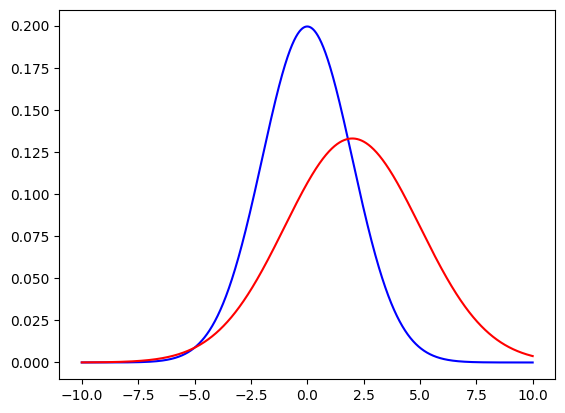

In [6]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c="blue")
plt.plot(x, q, c="red")

In [7]:
kl(p, q)

np.float64(349.9134833786811)

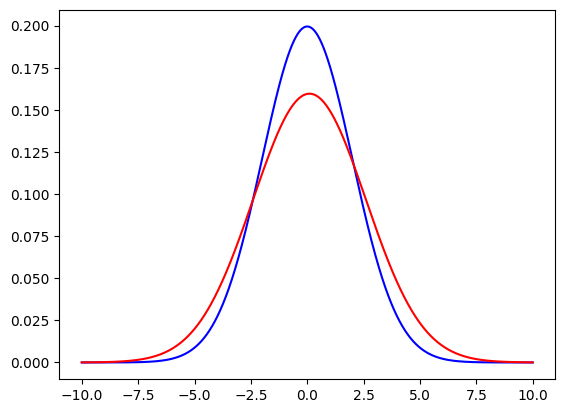

In [8]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c="blue")
plt.plot(x, q, c="red")

In [9]:
kl(p, q)

np.float64(43.946202336535066)

In [ ]:
dataset = os.path.join('datasets','weights_change.csv')
data = pd.read_csv(dataset)
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

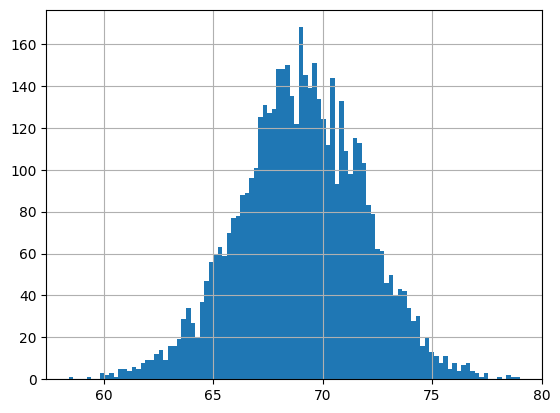

In [12]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [13]:
males.describe()['mean']

np.float64(69.02634590621741)

In [14]:
males.describe()['std']

np.float64(2.863362228660647)

In [15]:
count, devision = np.histogram(males, bins=100)
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [16]:
ideal = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
ideal

array([71.36885298, 72.86947153, 68.94084629, ..., 67.4494777 ,
       68.9474718 , 62.43807198], shape=(5000,))

In [17]:
ideal_count, ideal_devision = np.histogram(ideal, bins=100)
print(ideal_count)
print(ideal_devision)

[  1   0   0   1   2   2   1   2   0   3   1   0   2   5   7   9   6  10
   9   9   9  11  14  16  24  36  22  30  31  37  36  64  65  55  57  73
  78  76 103  87  83 103 102 122 123 113 131 131 121 114 132 128 125 127
 149 153 130 127 134 124 135 124 121 104  98  94  94  84  55  61  65  48
  41  44  48  43  35  32  29  34  19  18  24   9   9  11   6  10   8   6
   5   3   3   2   3   4   1   3   0   1]
[58.50568848 58.70584987 58.90601125 59.10617264 59.30633402 59.50649541
 59.70665679 59.90681818 60.10697956 60.30714095 60.50730233 60.70746372
 60.90762511 61.10778649 61.30794788 61.50810926 61.70827065 61.90843203
 62.10859342 62.3087548  62.50891619 62.70907757 62.90923896 63.10940035
 63.30956173 63.50972312 63.7098845  63.91004589 64.11020727 64.31036866
 64.51053004 64.71069143 64.91085281 65.1110142  65.31117558 65.51133697
 65.71149836 65.91165974 66.11182113 66.31198251 66.5121439  66.71230528
 66.91246667 67.11262805 67.31278944 67.51295082 67.71311221 67.9132736
 68.113434

(array([  1.,   0.,   0.,   1.,   2.,   2.,   1.,   2.,   0.,   3.,   1.,
          0.,   2.,   5.,   7.,   9.,   6.,  10.,   9.,   9.,   9.,  11.,
         14.,  16.,  24.,  36.,  22.,  30.,  31.,  37.,  36.,  64.,  65.,
         55.,  57.,  73.,  78.,  76., 103.,  87.,  83., 103., 102., 122.,
        123., 113., 131., 131., 121., 114., 132., 128., 125., 127., 149.,
        153., 130., 127., 134., 124., 135., 124., 121., 104.,  98.,  94.,
         94.,  84.,  55.,  61.,  65.,  48.,  41.,  44.,  48.,  43.,  35.,
         32.,  29.,  34.,  19.,  18.,  24.,   9.,   9.,  11.,   6.,  10.,
          8.,   6.,   5.,   3.,   3.,   2.,   3.,   4.,   1.,   3.,   0.,
          1.]),
 array([58.50568848, 58.70584987, 58.90601125, 59.10617264, 59.30633402,
        59.50649541, 59.70665679, 59.90681818, 60.10697956, 60.30714095,
        60.50730233, 60.70746372, 60.90762511, 61.10778649, 61.30794788,
        61.50810926, 61.70827065, 61.90843203, 62.10859342, 62.3087548 ,
        62.50891619, 62.70

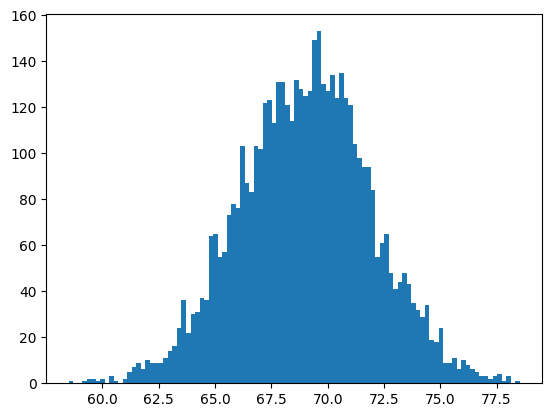

In [18]:
plt.hist(ideal, bins=100)

In [19]:
kl(count, ideal_count)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


np.float64(80.26074153557316)

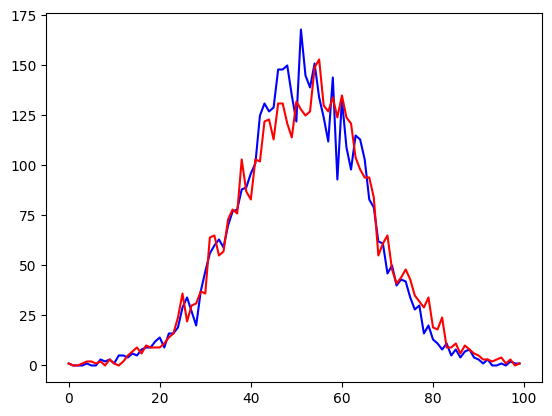

In [20]:
plt.plot(count, c="blue")
plt.plot(ideal_count, c="red")

In [21]:
count = count / 5000
ideal_count = ideal_count / 5000

In [22]:
kl(count, ideal_count)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_18348\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


np.float64(0.016052148307114635)

Remember: ```kl(p, q) != kl(q, p)```